
To load the Excel dataset, I need to import the pandas library first, then use `pd.read_excel()` to load the 'glass.xlsx' file into a DataFrame, and finally display the first 5 rows to verify the data was loaded correctly.



In [1]:
import pandas as pd
df = pd.read_excel('glass.xlsx')
print(df.head())

  Prepare a model for glass classification using Random Forest
0                                  Data Description:          
1                              RI : refractive index          
2  Na: Sodium (unit measurement: weight percent i...          
3                                      Mg: Magnesium          
4                                       AI: Aluminum          



The previous `pd.read_excel()` call incorrectly interpreted descriptive text as the DataFrame's header and first rows. Based on the output, the first 10 rows of the Excel file appear to be metadata describing the dataset and its features. To correctly load the data, I need to skip these initial rows so that the actual column headers are used.



In [2]:
df = pd.read_excel('glass.xlsx', skiprows=10)
print(df.head())

                                    Fe: Iron
0                                        NaN
1     Type: Type of glass: (class attribute)
2      1 -- building_windows_float_processed
3   2 --building_windows_non_float_processed
4        3 --vehicle_windows_float_processed



The previous attempts to load the Excel file incorrectly interpreted descriptive text as column headers and data. Based on the analysis of the output, there are approximately 19 lines of metadata (feature descriptions and class type descriptions) at the beginning of the file. To correctly load the data with the actual column headers (RI, Na, Mg, etc.), I need to skip these initial 19 rows.



In [3]:
df = pd.read_excel('glass.xlsx', skiprows=19)
print(df.head())

Empty DataFrame
Columns: [ 7 --headlamps]
Index: []



The previous attempts to load the Excel file by skipping a fixed number of rows have been unsuccessful, leading to either incorrect headers or an empty DataFrame. To accurately determine the correct number of rows to skip and identify the actual header, I will load the Excel file without specifying a header or skipping rows and then inspect the raw content of the first 25 rows to manually locate the true header row.



In [4]:
df_raw = pd.read_excel('glass.xlsx', header=None)
print(df_raw.head(25))

                                                    0
0   Prepare a model for glass classification using...
1                                   Data Description:
2                               RI : refractive index
3   Na: Sodium (unit measurement: weight percent i...
4                                       Mg: Magnesium
5                                        AI: Aluminum
6                                         Si: Silicon
7                                         K:Potassium
8                                         Ca: Calcium
9                                          Ba: Barium
10                                           Fe: Iron
11                                                NaN
12             Type: Type of glass: (class attribute)
13              1 -- building_windows_float_processed
14           2 --building_windows_non_float_processed
15                3 --vehicle_windows_float_processed
16   4 --vehicle_windows_non_float_processed (none...
17                          


Based on the inspection of the raw Excel content, the actual column headers (RI, Na, Mg, etc.) are located on row 20 (index 19 if starting from 0). Therefore, I need to reload the Excel file, skipping the first 19 rows to correctly capture the header and data.



In [5]:
df = pd.read_excel('glass.xlsx', skiprows=19)
print(df.head())

Empty DataFrame
Columns: [ 7 --headlamps]
Index: []



The previous attempt with `skiprows=19` resulted in an `Empty DataFrame` and incorrectly identified a descriptive string as the header. This contradicts the assumption that the actual column headers (RI, Na, Mg, etc.) are at row 20. Before making further assumptions about `skiprows`, it's crucial to understand the full structure of the Excel file, especially if there are multiple sheets. Listing the sheet names will help determine if the data might reside on a different sheet.



In [6]:
excel_file = pd.ExcelFile('glass.xlsx')
print(excel_file.sheet_names)

['Description', 'glass']



Since the previous step identified two sheets, 'Description' and 'glass', and all previous attempts to load data from the 'glass.xlsx' file resulted in incorrect headers or empty DataFrames, it is highly probable that the actual data resides in the 'glass' sheet. Therefore, I will try to load the 'glass' sheet specifically to see if it contains the correct data and headers.



In [7]:
df = pd.read_excel('glass.xlsx', sheet_name='glass')
print(df.head())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


## Exploratory Data Analysis (EDA)
Perform initial exploratory data analysis including checking the dataset's structure, data types, summary statistics, and identifying any missing values or inconsistencies. This step will also identify the target variable.



I will perform initial exploratory data analysis by printing a concise summary of the DataFrame, displaying its shape, generating descriptive statistics, checking for missing values, and identifying the target variable 'Type' by checking its unique values and counts.



In [8]:
print('DataFrame Info:')
df.info()
print('\nDataFrame Shape:')
print(df.shape)
print('\nDescriptive Statistics:')
print(df.describe())
print('\nMissing Values:')
print(df.isnull().sum())
print('\nTarget Variable (Type) Value Counts:')
print(df['Type'].value_counts())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB

DataFrame Shape:
(214, 10)

Descriptive Statistics:
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min    

## Data Visualization


Create various visualizations such as histograms for feature distributions, box plots to identify outliers, and pair plots to visualize relationships between features and identify patterns or correlations. Ensure legends are provided for all plots.



I will create a comprehensive visualization to understand the distribution of features, identify outliers, and observe relationships between features, including the target variable 'Type'. This involves generating histograms, box plots, and a pair plot as requested.



Generating Histograms for Feature Distributions...


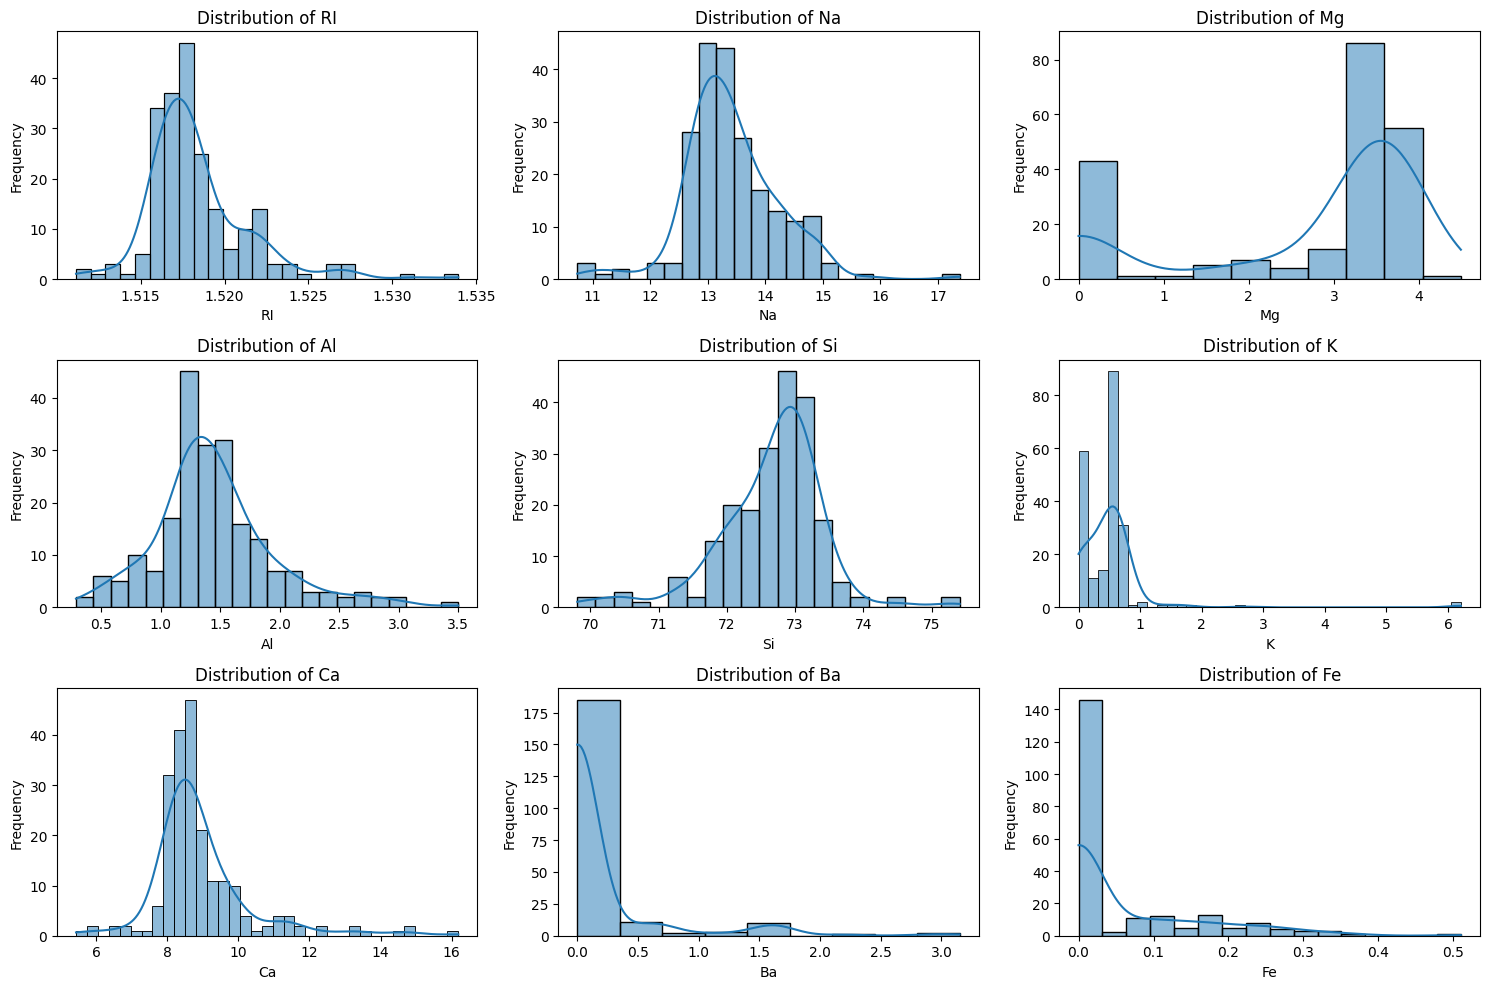


Generating Box Plots for Outlier Identification...


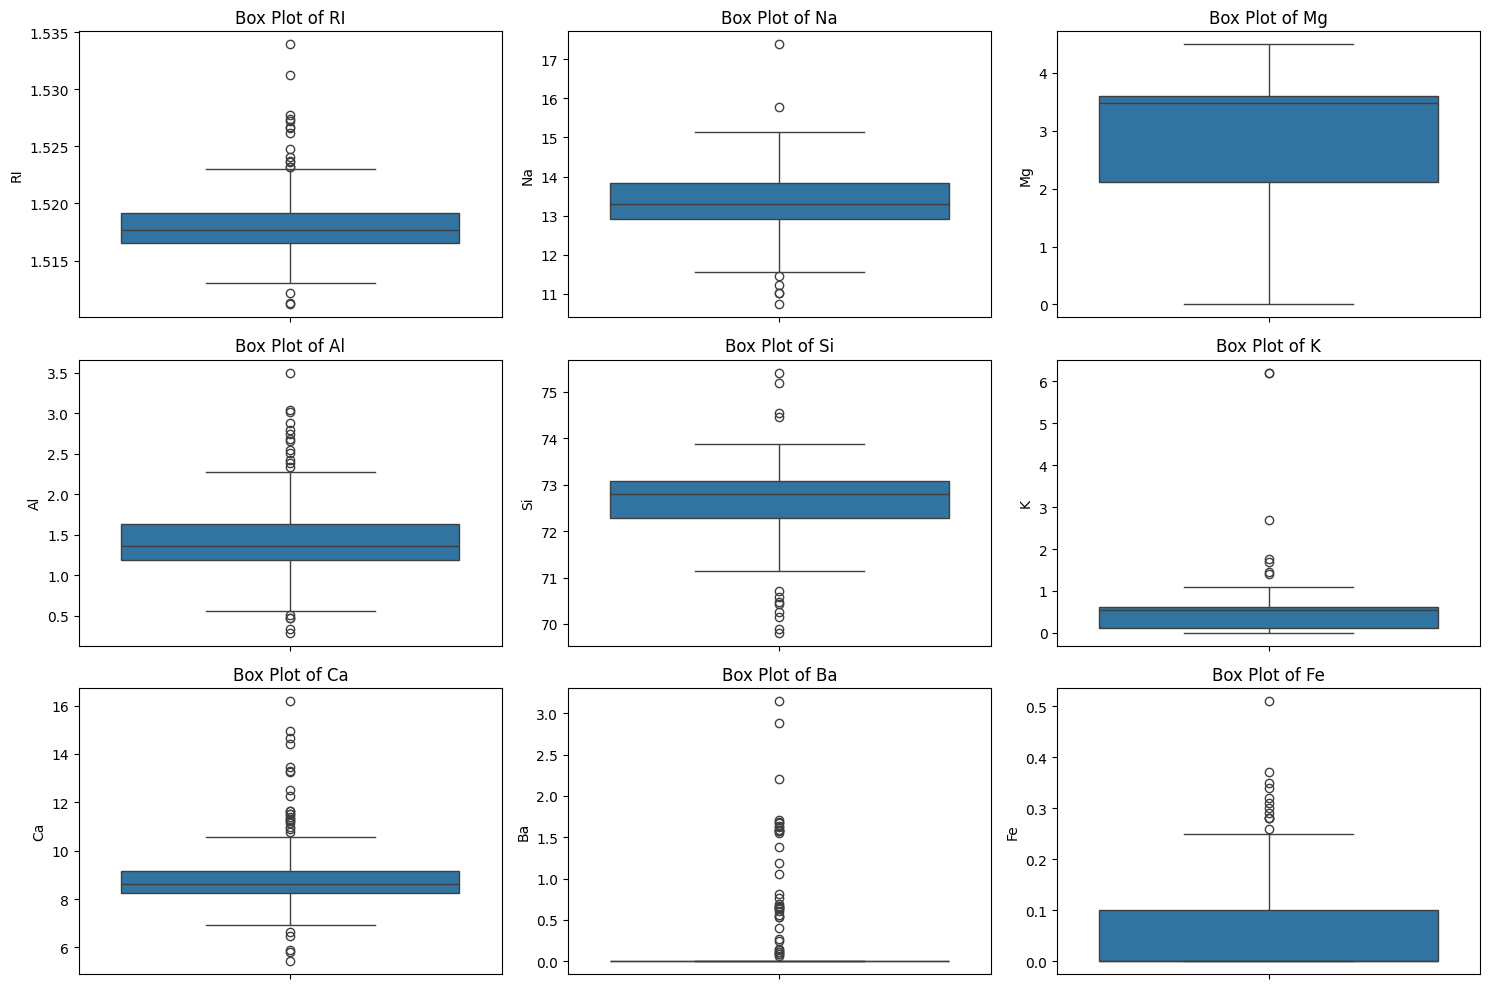


Generating Pair Plot...


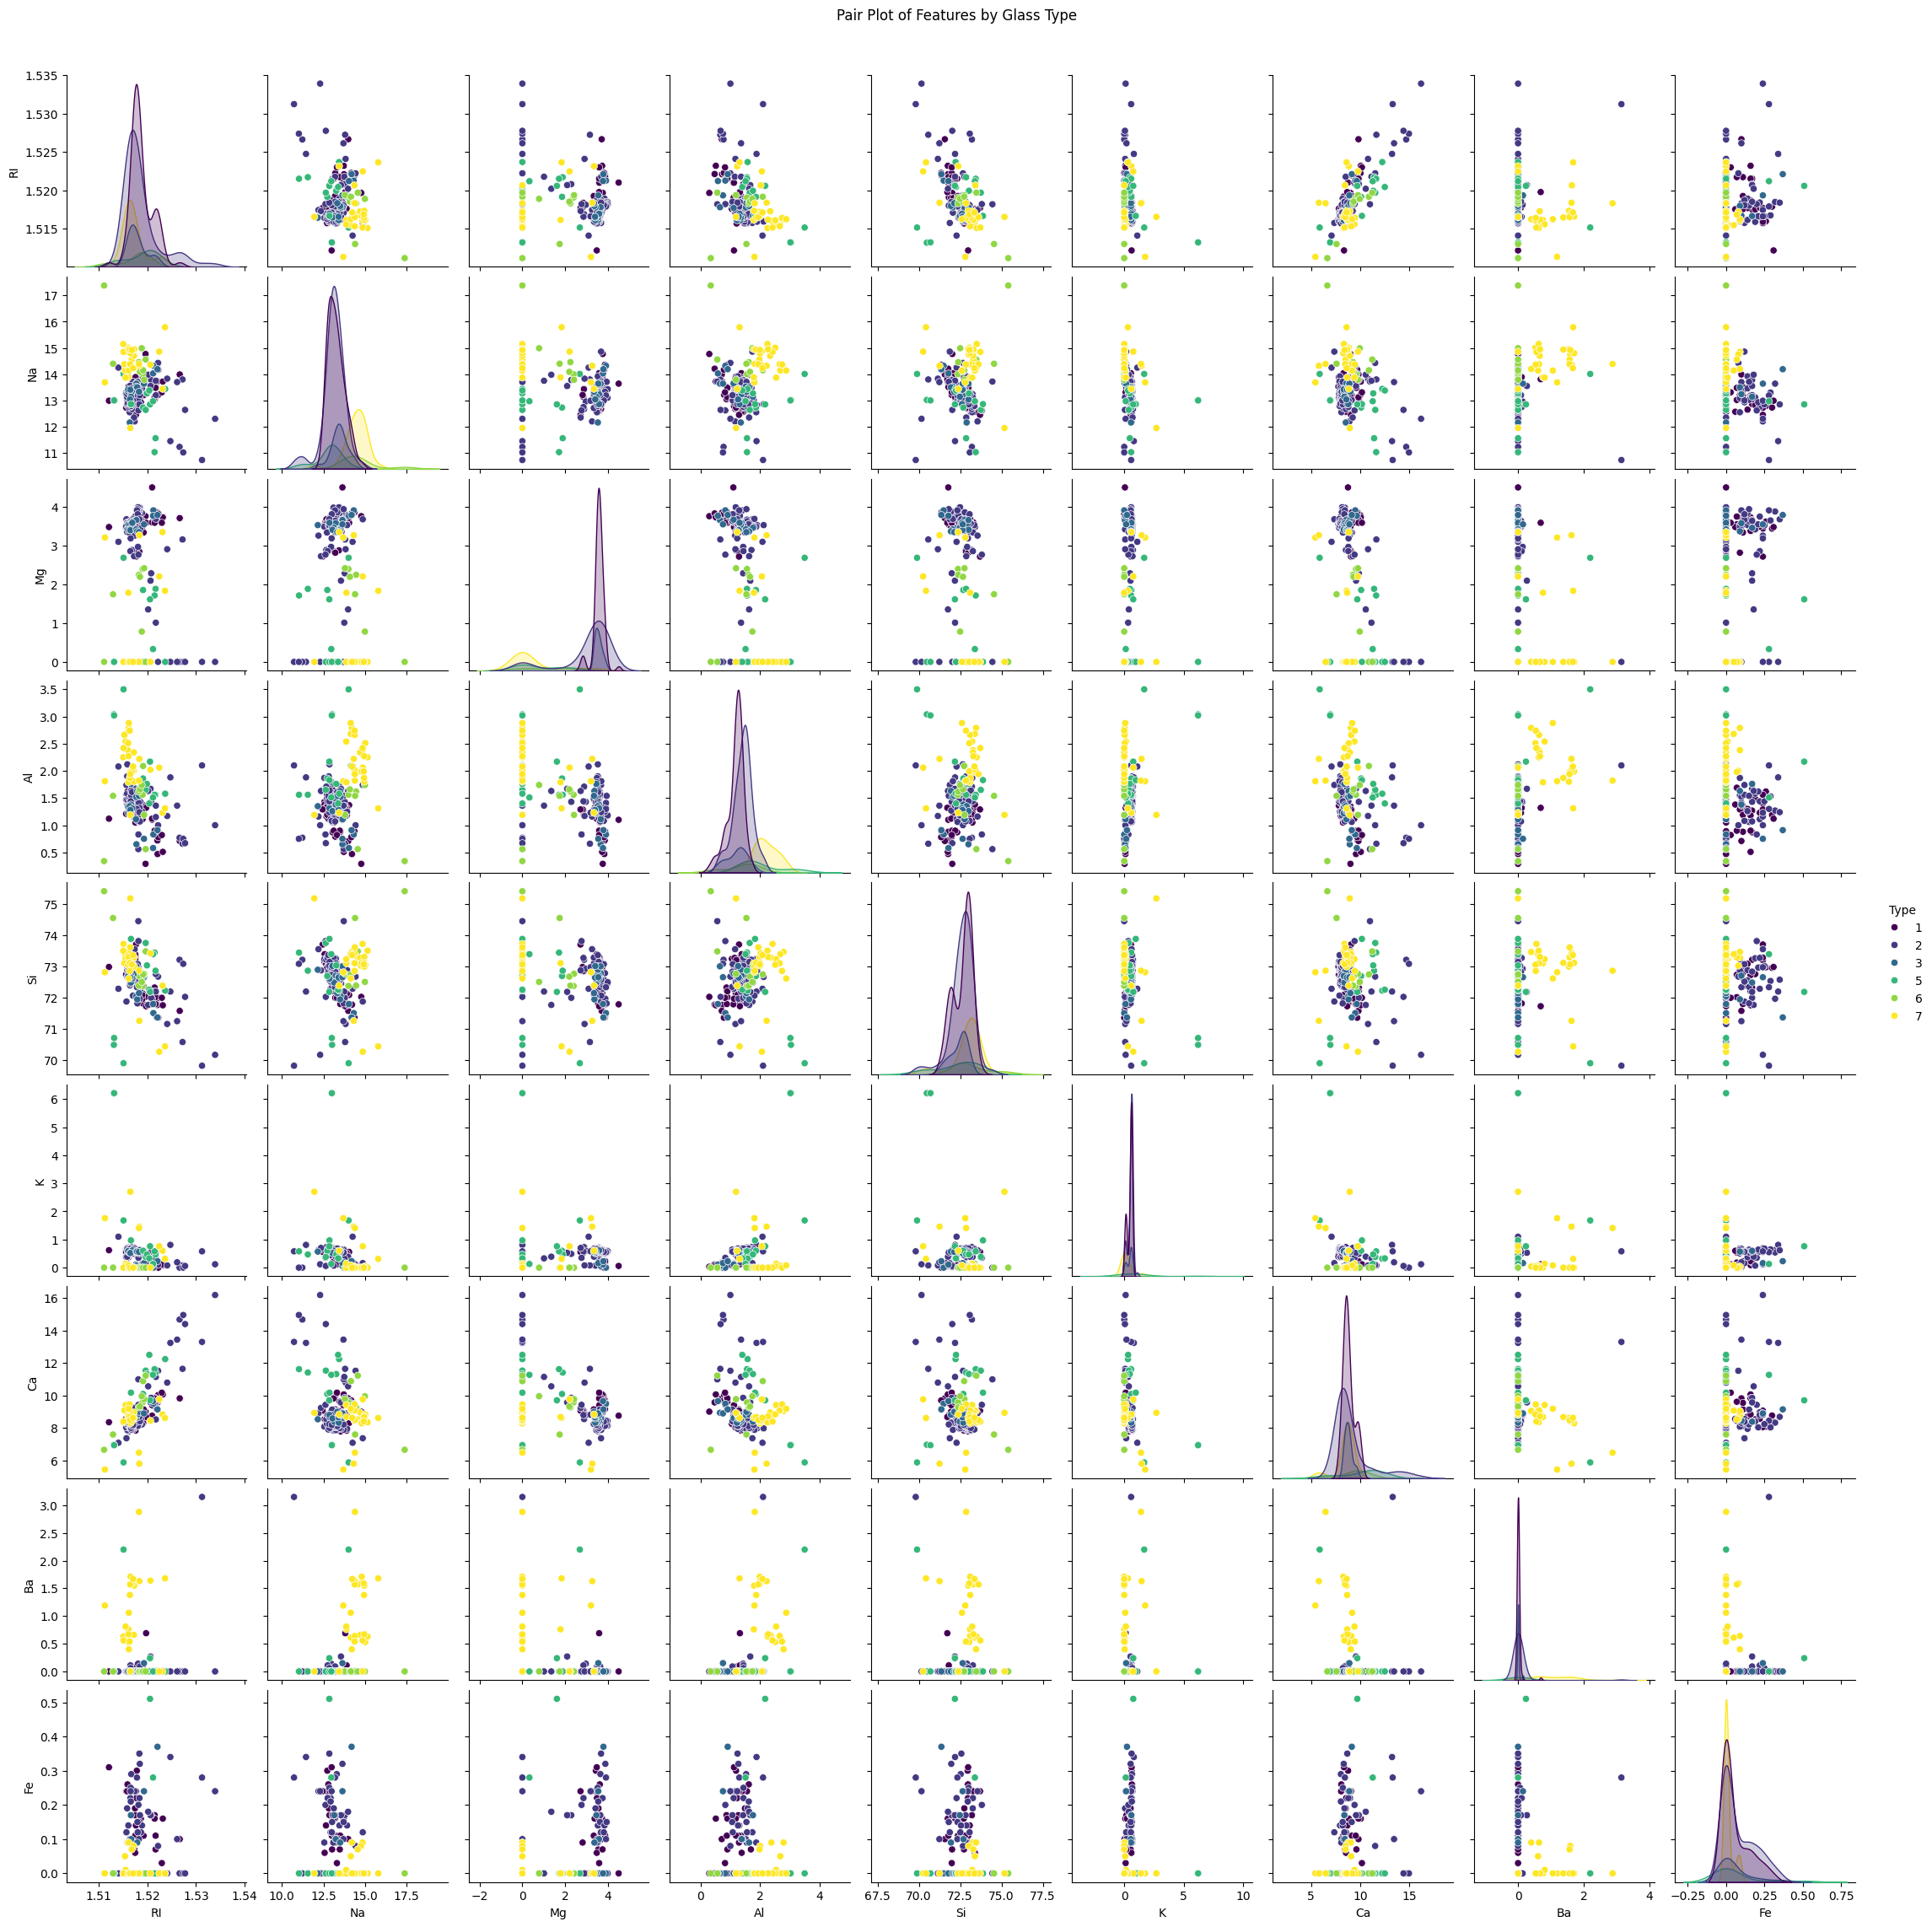


Data visualization complete.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude the target variable 'Type' for feature plots
features = df.drop('Type', axis=1).columns

# 2. Create Histograms for feature distributions
print('Generating Histograms for Feature Distributions...')
plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid as needed, assuming up to 9 features
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 3. Create Box Plots to identify outliers
print('\nGenerating Box Plots for Outlier Identification...')
plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid as needed
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# 4. Generate a Pair Plot to visualize relationships between features, colored by 'Type'
print('\nGenerating Pair Plot...')
sns.pairplot(df, hue='Type', palette='viridis')
plt.suptitle('Pair Plot of Features by Glass Type', y=1.02) # Adjust suptitle position
plt.show()

print('\nData visualization complete.')

## Handle Missing Values and Categorical Features


Check for and handle any missing values in the dataset using an appropriate strategy (e.g., imputation or removal), explaining the reasoning. If there are any categorical variables, apply suitable encoding techniques like one-hot encoding to convert them into a numerical format.


The previous Exploratory Data Analysis (EDA) confirmed that the dataset `df` contains no missing values and all feature columns are already numerical (float64). The target variable 'Type' is also numerical. Therefore, no specific actions are required for handling missing values or encoding categorical features in this step.

## Handle Imbalanced Data and Feature Scaling


Analyze the distribution of the target variable to check for class imbalance and apply appropriate techniques if necessary. Apply feature scaling techniques such as standardization or normalization to ensure all features are on a similar scale.



The subtask requires handling imbalanced data and applying feature scaling. I will separate the features and target variable, check the original class distribution, apply RandomOverSampler to address imbalance, verify the new class distribution, and then apply StandardScaler to the features.



In [10]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Separate the features (X) and the target variable (y)
X = df.drop('Type', axis=1)
y = df['Type']

print('Original feature set (X) shape:', X.shape)
print('Original target set (y) shape:', y.shape)

# 2. Confirm the class distribution of the original target variable y
print('\nOriginal Target Variable (y) Value Counts:')
print(y.value_counts())

# 3. Apply RandomOverSampler to address class imbalance
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# 4. Verify the new class distribution of y_resampled
print('\nResampled Target Variable (y_resampled) Value Counts:')
print(y_resampled.value_counts())

# 5. Import StandardScaler and instantiate a StandardScaler object.
scaler = StandardScaler()

# 6. Fit the scaler on X_resampled and then transform X_resampled
X_scaled = scaler.fit_transform(X_resampled)

print('\nScaled feature set (X_scaled) shape:', X_scaled.shape)
print('\nFirst 5 rows of scaled features (X_scaled):')
print(pd.DataFrame(X_scaled, columns=X.columns).head())

Original feature set (X) shape: (214, 9)
Original target set (y) shape: (214,)

Original Target Variable (y) Value Counts:
Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

Resampled Target Variable (y_resampled) Value Counts:
Type
1    76
2    76
3    76
5    76
6    76
7    76
Name: count, dtype: int64

Scaled feature set (X_scaled) shape: (456, 9)

First 5 rows of scaled features (X_scaled):
         RI        Na        Mg        Al        Si         K        Ca  \
0  0.954078  0.011312  1.513564 -0.754336 -1.000304 -0.473609 -0.244444   
1 -0.201928  0.263667  0.944700 -0.311965  0.052827 -0.026409 -0.851028   
2 -0.688131 -0.099725  0.912742 -0.005709  0.341052 -0.122237 -0.883994   
3 -0.184928 -0.422739  1.002226 -0.431065 -0.080200  0.069420 -0.593889   
4 -0.266529 -0.362174  0.957484 -0.516136  0.440822  0.048124 -0.692789   

         Ba        Fe  
0 -0.404645 -0.441491  
1 -0.404645 -0.441491  
2 -0.404645 -0.441491  
3 -0.404645 -0.441491  
4

## Split Data

Divide the preprocessed dataset into training and testing sets to prepare for model implementation and evaluation.



To divide the preprocessed dataset into training and testing sets as per the subtask instructions, I need to import `train_test_split`, apply it to `X_scaled` and `y_resampled` with the specified parameters, and then print the shapes of the resulting sets to verify the split.



In [11]:
from sklearn.model_selection import train_test_split

# Split the X_scaled and y_resampled datasets into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Print the shapes of the resulting training and testing sets
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (364, 9)
Shape of X_test: (92, 9)
Shape of y_train: (364,)
Shape of y_test: (92,)


## Implement Random Forest Classifier

Implement a Random Forest classifier using scikit-learn. Train the model on the training data and evaluate its performance on the test set using metrics like accuracy, precision, recall, and F1-score.



To implement the Random Forest Classifier, I need to import the necessary modules, instantiate the model, train it on the training data, make predictions on the test data, and then evaluate its performance using accuracy score and a classification report.



In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Instantiate a RandomForestClassifier with random_state=42
rf_classifier = RandomForestClassifier(random_state=42)

# 2. Train the classifier using the X_train and y_train datasets
print('Training Random Forest Classifier...')
rf_classifier.fit(X_train, y_train)
print('Training complete.')

# 3. Make predictions on the X_test dataset
y_pred_rf = rf_classifier.predict(X_test)

# 4. Print the accuracy score
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'\nAccuracy Score: {accuracy:.4f}')

# 5. Print a classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred_rf))

Training Random Forest Classifier...
Training complete.

Accuracy Score: 0.9565

Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.87      0.90        15
           2       1.00      0.87      0.93        15
           3       0.88      1.00      0.94        15
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        16
           7       0.94      1.00      0.97        15

    accuracy                           0.96        92
   macro avg       0.96      0.96      0.96        92
weighted avg       0.96      0.96      0.96        92



## Implement Bagging Classifier


Implement a Bagging classifier (e.g., BaggingClassifier from scikit-learn) using the training data. Evaluate its performance on the test set using accuracy, precision, recall, and F1-score.



To implement the Bagging Classifier as per the subtask, I need to import the necessary class, instantiate it, train the model on the preprocessed training data, and then evaluate its performance on the test set using accuracy score and a classification report.



In [13]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Instantiate a BaggingClassifier with random_state=42
bagging_classifier = BaggingClassifier(random_state=42)

# 2. Train the classifier using the X_train and y_train datasets
print('Training Bagging Classifier...')
bagging_classifier.fit(X_train, y_train)
print('Training complete.')

# 3. Make predictions on the X_test dataset
y_pred_bagging = bagging_classifier.predict(X_test)

# 4. Print the accuracy score
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f'\nBagging Classifier Accuracy Score: {accuracy_bagging:.4f}')

# 5. Print a classification report
print('\nBagging Classifier Classification Report:')
print(classification_report(y_test, y_pred_bagging))

Training Bagging Classifier...
Training complete.

Bagging Classifier Accuracy Score: 0.9022

Bagging Classifier Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.73      0.73        15
           2       0.77      0.67      0.71        15
           3       0.94      1.00      0.97        15
           5       1.00      1.00      1.00        16
           6       0.94      1.00      0.97        16
           7       1.00      1.00      1.00        15

    accuracy                           0.90        92
   macro avg       0.90      0.90      0.90        92
weighted avg       0.90      0.90      0.90        92



## Implement Boosting Classifier

Implement a Boosting classifier (e.g., AdaBoost or GradientBoostingClassifier from scikit-learn) using the training data. Evaluate its performance on the test set using accuracy, precision, recall, and F1-score.



To implement the Boosting Classifier as per the subtask, I need to import the necessary class, instantiate it, train the model on the preprocessed training data, and then evaluate its performance on the test set using accuracy score and a classification report.



In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Instantiate a GradientBoostingClassifier with random_state=42
gbc_classifier = GradientBoostingClassifier(random_state=42)

# 2. Train the classifier using the X_train and y_train datasets
print('Training Gradient Boosting Classifier...')
gbc_classifier.fit(X_train, y_train)
print('Training complete.')

# 3. Make predictions on the X_test dataset
y_pred_gbc = gbc_classifier.predict(X_test)

# 4. Print the accuracy score
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
print(f'\nGradient Boosting Classifier Accuracy Score: {accuracy_gbc:.4f}')

# 5. Print a classification report
print('\nGradient Boosting Classifier Classification Report:')
print(classification_report(y_test, y_pred_gbc))

Training Gradient Boosting Classifier...
Training complete.

Gradient Boosting Classifier Accuracy Score: 0.9565

Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.93      0.88        15
           2       1.00      0.80      0.89        15
           3       0.94      1.00      0.97        15
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        15

    accuracy                           0.96        92
   macro avg       0.96      0.96      0.96        92
weighted avg       0.96      0.96      0.96        92



## Compare Model Results and Explain Methods

Compare the performance metrics (accuracy, precision, recall, F1-score) of the Random Forest, Bagging, and Boosting models. Additionally, provide an explanation of Bagging and Boosting methods, highlighting their differences. Also, explain how to handle imbalanced data effectively.



I need to compare the performance metrics of the Random Forest, Bagging, and Boosting models. The accuracy scores and classification reports for these models are already available in the kernel state. I will use the print command to present these metrics for easy comparison.



In [15]:
from sklearn.metrics import classification_report, accuracy_score

# Random Forest Classifier metrics
print('--- Random Forest Classifier Performance ---')
print(f'Accuracy Score: {accuracy:.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred_rf))

# Bagging Classifier metrics
print('\n--- Bagging Classifier Performance ---')
print(f'Accuracy Score: {accuracy_bagging:.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred_bagging))

# Gradient Boosting Classifier metrics
print('\n--- Gradient Boosting Classifier Performance ---')
print(f'Accuracy Score: {accuracy_gbc:.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred_gbc))

--- Random Forest Classifier Performance ---
Accuracy Score: 0.9565

Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.87      0.90        15
           2       1.00      0.87      0.93        15
           3       0.88      1.00      0.94        15
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        16
           7       0.94      1.00      0.97        15

    accuracy                           0.96        92
   macro avg       0.96      0.96      0.96        92
weighted avg       0.96      0.96      0.96        92


--- Bagging Classifier Performance ---
Accuracy Score: 0.9022

Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.73      0.73        15
           2       0.77      0.67      0.71        15
           3       0.94      1.00      0.97        15
           5       1.00      1.00      1.00        16
       

## Summary:

### Q&A
*   **What are Bagging and Boosting methods and how do they differ?**
    Bagging (Bootstrap Aggregating) is an ensemble method that aims to reduce variance by training multiple models independently on different bootstrap samples of the data and then aggregating their predictions (e.g., majority vote for classification). Boosting, on the other hand, is a sequential ensemble method that aims to reduce bias by training weak learners iteratively, where each subsequent model tries to correct the errors of the previous ones, assigning higher weights to misclassified samples.
    The key differences include:
    *   **Learning Type**: Bagging is parallel, while Boosting is sequential.
    *   **Goal**: Bagging primarily reduces variance; Boosting primarily reduces bias.
    *   **Data Handling**: Bagging uses random bootstrap samples; Boosting focuses on errors of previous models.
    *   **Weights**: Bagging uses equal weights for model predictions; Boosting uses weighted contributions.
    *   **Base Learners**: Bagging often uses complex models; Boosting typically uses simple, weak learners.

*   **How can imbalanced data be handled effectively?**
    Effective strategies for handling imbalanced data include:
    1.  **Resampling Techniques**: Oversampling (e.g., RandomOverSampler, SMOTE) to increase minority class instances, or Undersampling (e.g., RandomUnderSampler, Tomek Links) to decrease majority class instances.
    2.  **Using Different Algorithms**: Some algorithms are inherently less sensitive to imbalance.
    3.  **Adjusting Class Weights**: Assigning higher weights to the minority class during model training.
    4.  **Cost-Sensitive Learning**: Penalizing misclassifications of the minority class more heavily.
    5.  **Appropriate Evaluation Metrics**: Moving beyond accuracy to metrics like Precision, Recall, F1-Score, Confusion Matrix, and AUC-ROC/AUC-PR, which provide a more accurate picture of performance for imbalanced datasets.

*   **How do the Random Forest, Bagging, and Boosting classifiers compare in performance?**
    *   **Random Forest** and **Gradient Boosting** classifiers performed best, both achieving an accuracy of 0.9565 and a macro-averaged F1-score of 0.96.
    *   The **Bagging Classifier** performed reasonably well but showed slightly lower performance with an accuracy of 0.9022 and a macro-averaged F1-score of 0.90.

### Data Analysis Key Findings
*   The 'glass.xlsx' dataset, located in the 'glass' sheet, contains 214 entries and 10 columns (9 numerical features, 1 integer target variable 'Type').
*   No missing values were identified in the dataset, and all features were already numerical, eliminating the need for imputation or categorical encoding.
*   The target variable 'Type' exhibited significant class imbalance, with counts ranging from 9 instances (Type 6) to 76 instances (Type 2).
*   To address class imbalance, `RandomOverSampler` was applied, resulting in a balanced dataset of 456 samples, with each of the 6 classes having 76 instances.
*   Feature scaling was performed using `StandardScaler` on the resampled features to standardize their ranges.
*   The preprocessed and resampled data was split into training (364 samples) and testing (92 samples) sets using an 80/20 ratio with stratification to preserve class distribution.
*   After training and evaluation on the balanced and scaled data:
    *   **Random Forest Classifier** achieved an accuracy of 0.9565 and a macro average F1-score of 0.96.
    *   **Bagging Classifier** achieved an accuracy of 0.9022 and a macro average F1-score of 0.90.
    *   **Gradient Boosting Classifier** achieved an accuracy of 0.9565 and a macro average F1-score of 0.96.

### Insights or Next Steps
*   Both Random Forest and Gradient Boosting models demonstrated strong performance on the balanced dataset, indicating their suitability for this multi-class classification problem. Further hyperparameter tuning could potentially enhance their performance even more.
*   Given the similar performance of Random Forest and Gradient Boosting, a deeper analysis of their interpretability or computational cost might be beneficial for final model selection. Exploring other oversampling techniques like SMOTE could also be considered to see if it yields better results than simple random oversampling.
